## Install CatBoost

In [1]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from xgboost import XGBClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Import Data

In [3]:
df=pd.read_csv("Pima Indians Diabetes Dataset.csv")

## Top 5 Rows of Data

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Last 5 Rows of Data

In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Dimensions of Data

In [6]:
df.shape

(768, 9)

## Information about Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Description

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Replace 0 with NaN

In [9]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']].replace(0,np.NAN)

## Count Null Values

In [10]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Replace Null Values with Mean of Column

In [11]:
df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace=True)
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(),inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace=True)

<ipython-input-11-d35eb8d5252e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace=True)
<ipython-input-11-d35eb8d5252e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

## Maximum of each column

In [12]:
df.max()

,0
Pregnancies,17.00
Glucose,199.00
BloodPressure,122.00
SkinThickness,99.00
Insulin,846.00
BMI,67.10
DiabetesPedigreeFunction,2.42
Age,81.00
Outcome,1.00


## Minimum of each Column

In [13]:
df.min()

,0
Pregnancies,0.000
Glucose,44.000
BloodPressure,24.000
SkinThickness,7.000
Insulin,14.000
BMI,18.200
DiabetesPedigreeFunction,0.078
Age,21.000
Outcome,0.000


## Correlation of Columns

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


## Relationships between each Pair of Features

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

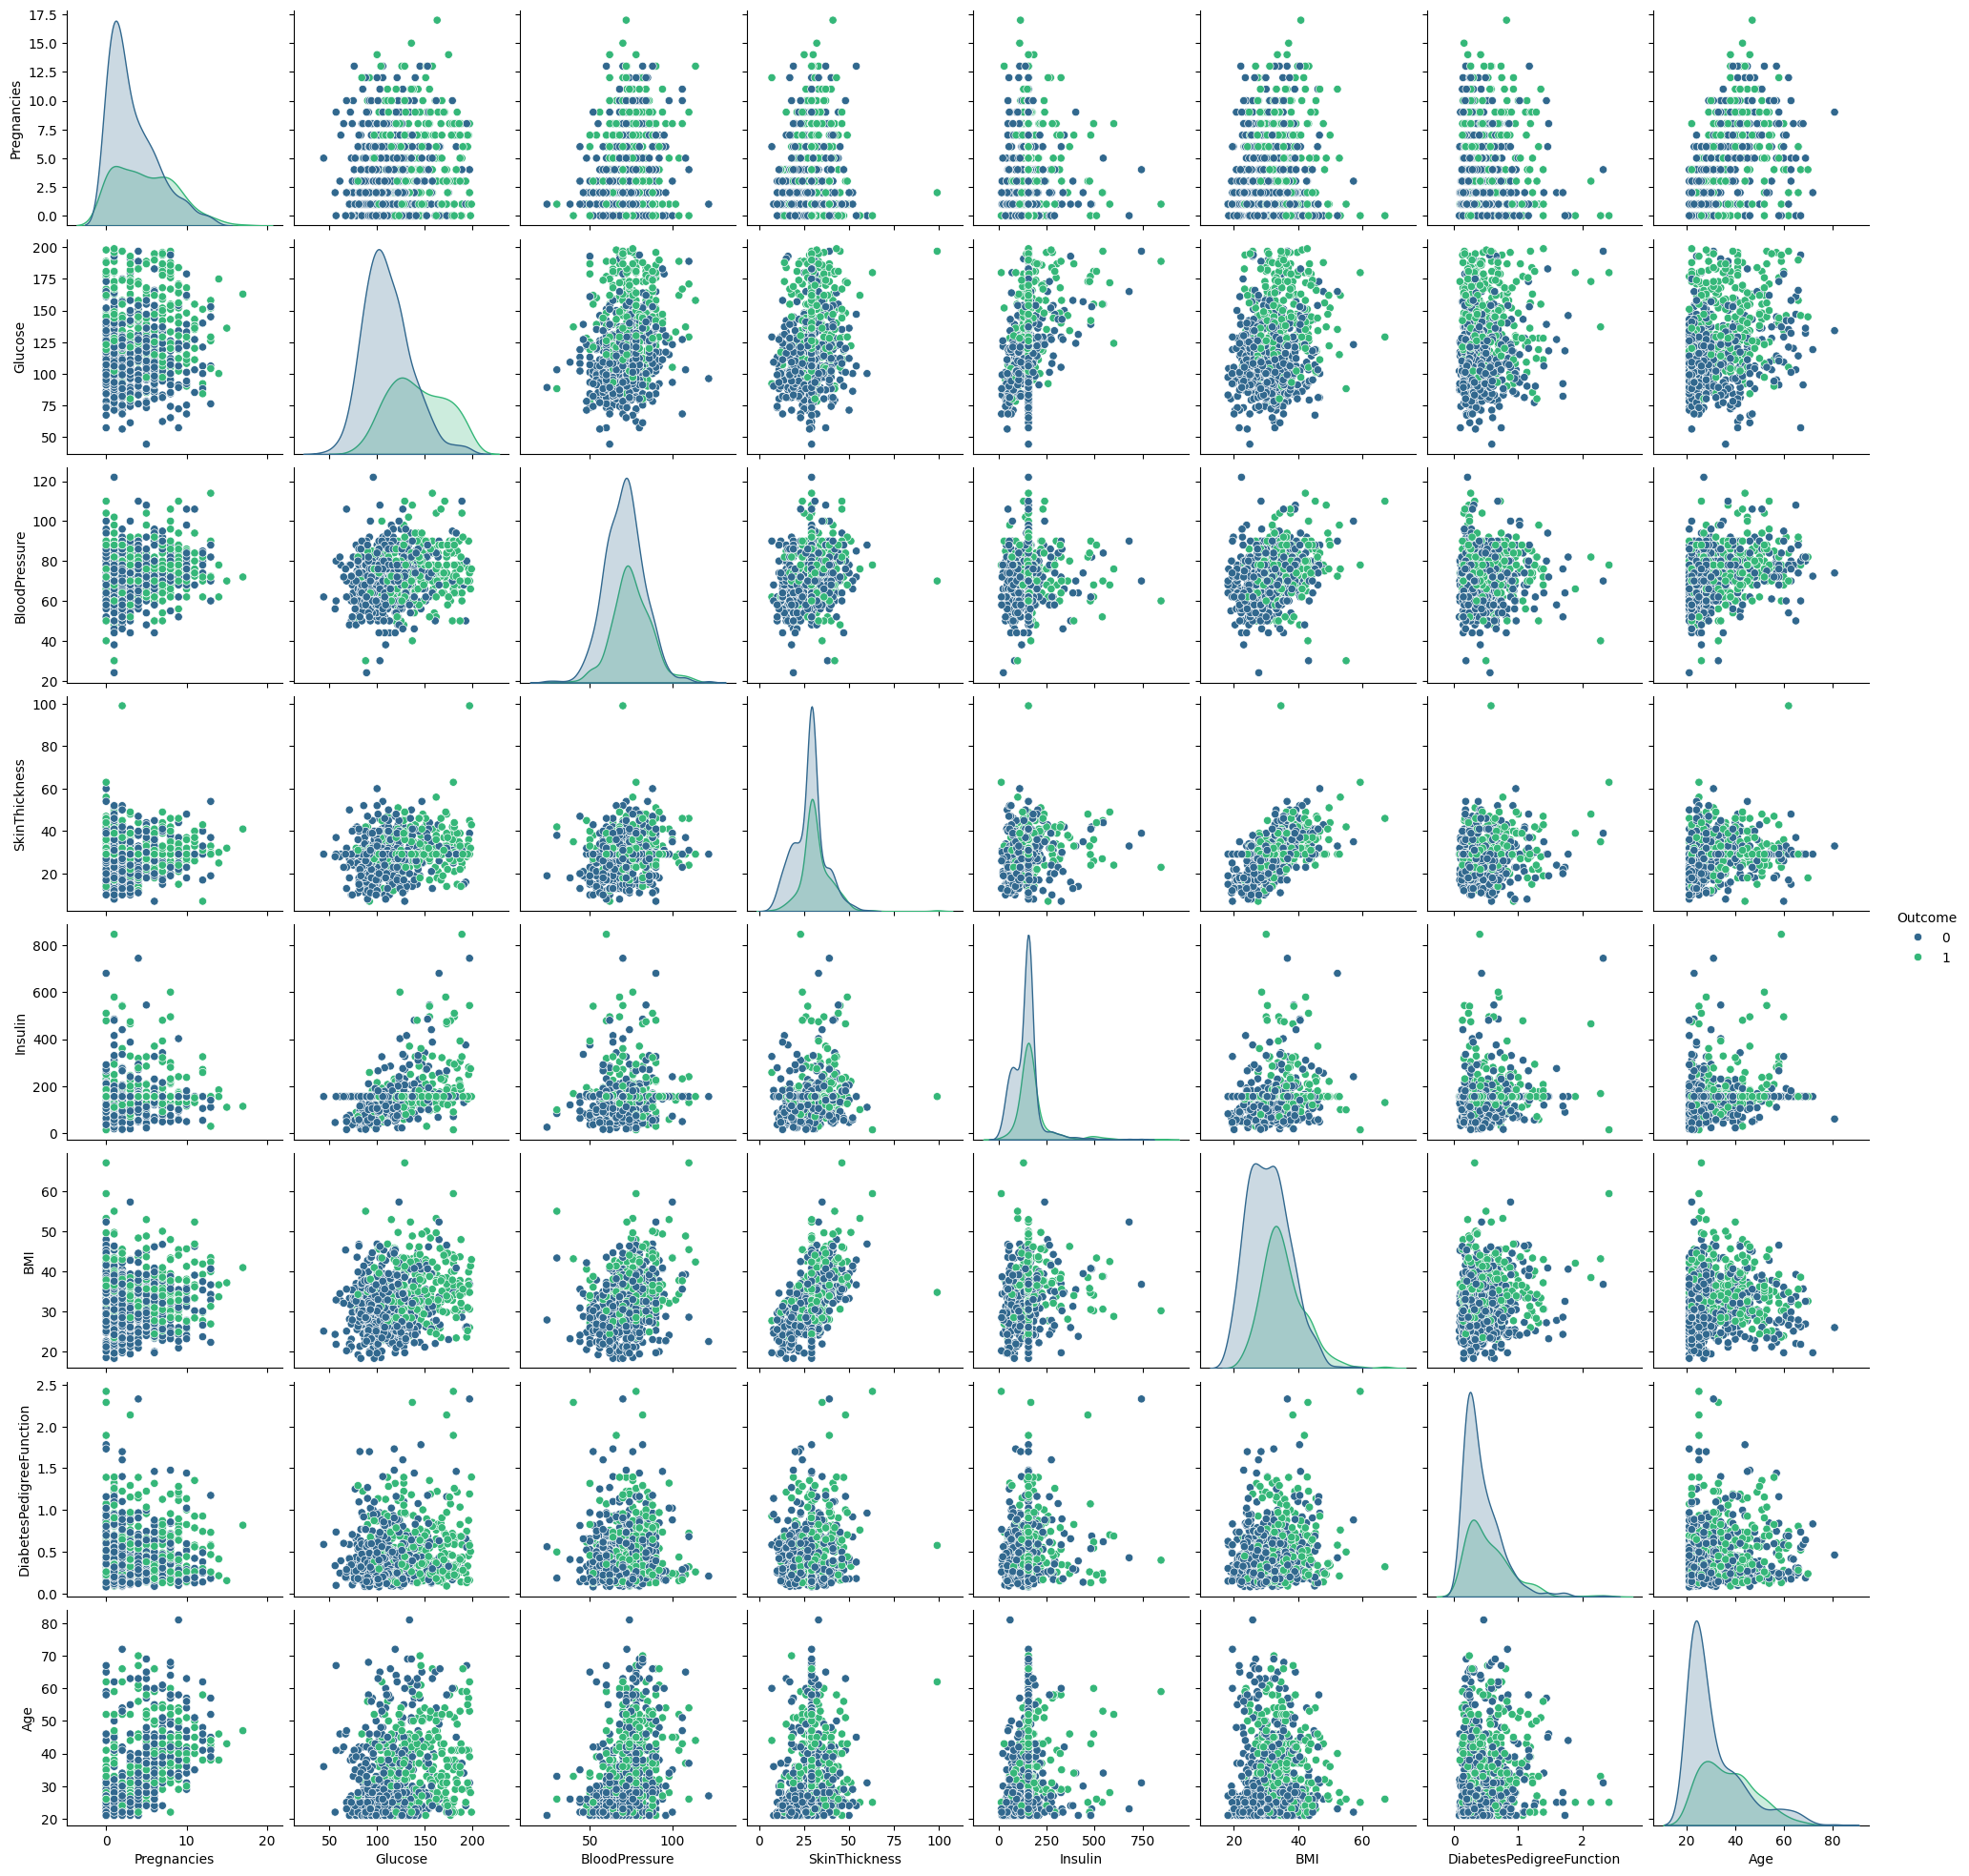

In [15]:
sns.pairplot(df,hue='Outcome',palette='viridis')
plt.show()

## Correlation Plot

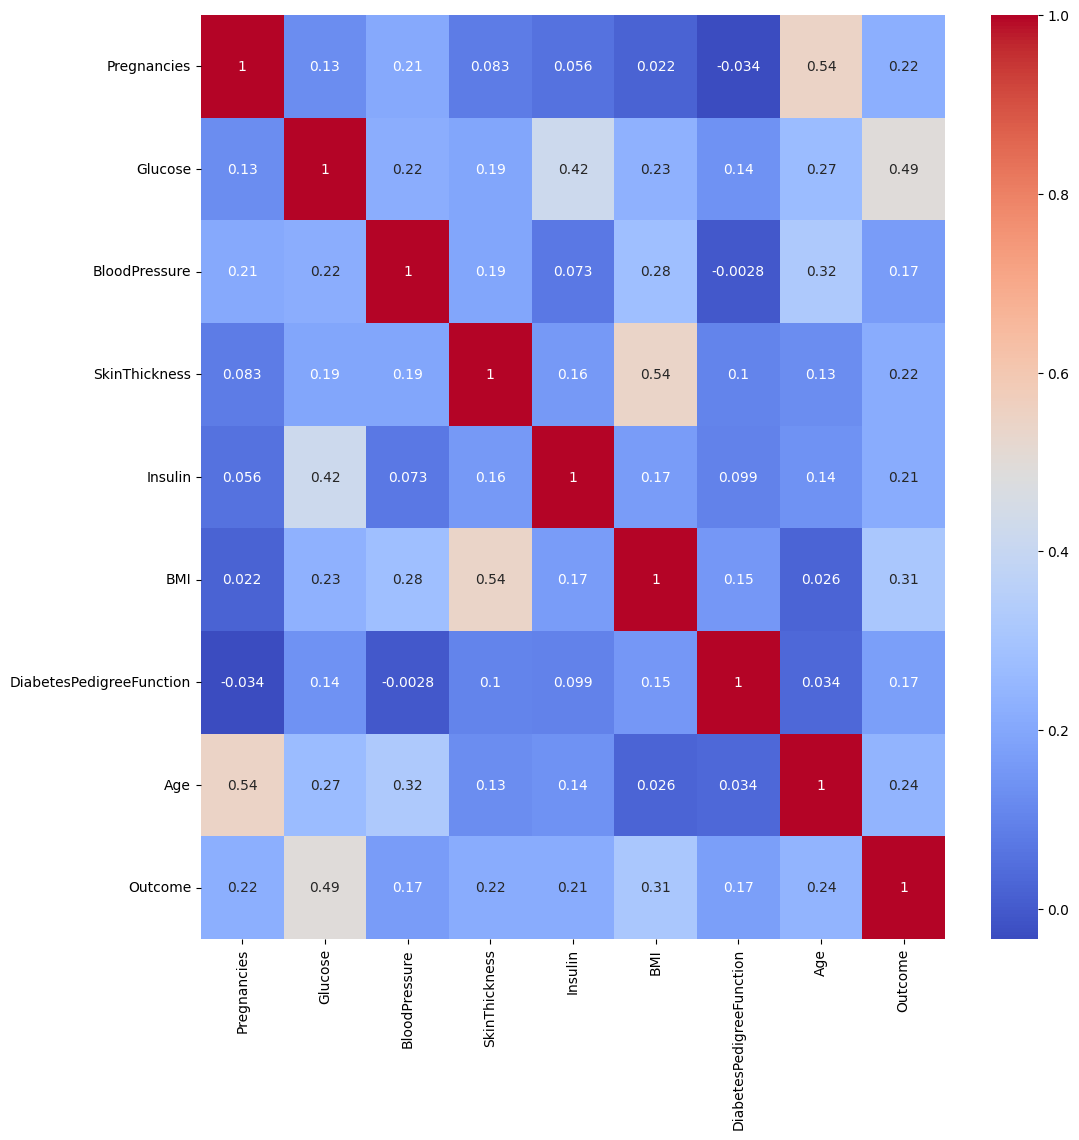

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

## Adding new Features

In [17]:
# Combine Age and Pregnancies into a new feature
df['Age_Pregnancies'] = df['Age'] * df['Pregnancies']

# Combine BMI and SkinThickness into a new feature
df['BMI_SkinThickness'] = df['BMI'] * df['SkinThickness']

## Count of Diabetic and Non-Diabetic

In [18]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


## Splitting Features and Target Variable

In [19]:
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

## Feature Scaling

In [20]:
sc=StandardScaler()
X=sc.fit_transform(X)

## Train and Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

## Balancing the Dataset Using SMOTE

In [22]:
sm = SMOTE(random_state = 2)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# **LightGBM Model**

## Hyperparameter Tuning of LightGBM Model

In [23]:
# Define the parameter grid
param_grid = {
    'n_estimators': [49, 100, 200],          # Number of boosting rounds
    'max_depth': [4,-1],                 # Maximum depth of trees
    'learning_rate': [0.01, 0.1],        # Step size shrinkage
    'reg_lambda': [0, 1],                # L2 regularization term on weights
    'num_leaves': [31, 63],              # Number of leaves in full trees
    'subsample': [0.8, 1.0],             # Subsampling ratio
    'colsample_bytree': [0.8, 1.0],      # Subsampling of features
    'min_split_gain': [0, 1],            # Minimum gain to perform a split
    'random_state': [42]                 # Random state for reproducibility
}

# Manual grid search without cross-validation
best_params = None
best_accuracy = 0

# Iterate through each combination of hyperparameters
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for learning_rate in param_grid['learning_rate']:
            for reg_lambda in param_grid['reg_lambda']:
                for num_leaves in param_grid['num_leaves']:
                    for subsample in param_grid['subsample']:
                        for colsample_bytree in param_grid['colsample_bytree']:
                            for min_split_gain in param_grid['min_split_gain']:
                                # Train the model with the current combination of hyperparameters
                                model = lgb.LGBMClassifier(n_estimators=n_estimators,
                                                           max_depth=max_depth,
                                                           learning_rate=learning_rate,
                                                           reg_lambda=reg_lambda,
                                                           num_leaves=num_leaves,
                                                           subsample=subsample,
                                                           colsample_bytree=colsample_bytree,
                                                           min_split_gain=min_split_gain,
                                                           random_state=42)
                                model.fit(X_train_bal, y_train_bal)

                                # Evaluate on the validation set
                                y_pred = model.predict(X_test)
                                accuracy = accuracy_score(y_test, y_pred)

                                # Track the best parameters and accuracy
                                if accuracy > best_accuracy:
                                    best_accuracy = accuracy
                                    best_params = {
                                        'n_estimators': n_estimators,
                                        'max_depth': max_depth,
                                        'learning_rate': learning_rate,
                                        'reg_lambda': reg_lambda,
                                        'num_leaves': num_leaves,
                                        'subsample': subsample,
                                        'colsample_bytree': colsample_bytree,
                                        'min_split_gain': min_split_gain
                                    }

print(f"Best Parameters: {best_params}")
print(f"Validation Accuracy: {best_accuracy:.4f}")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

## LightGBM Best Model after Tuning

In [24]:
lbg=lgb.LGBMClassifier(n_estimators=49)
lbg.fit(X_train_bal,y_train_bal)
y_pred_light= lbg.predict(X_test)

# Get predictions


# Evaluation metrics
accuracy_light = accuracy_score(y_test, y_pred_light)
precision_light = precision_score(y_test, y_pred_light)
recall_light = recall_score(y_test, y_pred_light)
f1_light = f1_score(y_test, y_pred_light)

print(f"Accuracy: {accuracy_light:.4f}")
print(f"Precision: {precision_light:.4f}")
print(f"Recall: {recall_light:.4f}")
print(f"F1 Score: {f1_light:.4f}")


[LightGBM] [Info] Number of positive: 345, number of negative: 345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1368
[LightGBM] [Info] Number of data points in the train set: 690, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

# **XGBoost Model**

## Hyperparameter Tuning of XGBoost Model

In [25]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 130],          # Number of boosting rounds
    'max_depth': [4, 6],                 # Maximum depth of trees
    'learning_rate': [0.01, 0.3],        # Step size shrinkage
    'reg_alpha': [1, 6],                 # L1 regularization term on weights
    'min_child_weight': [1, 5],          # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.7, 1.0],             # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],      # Subsample ratio of columns when constructing each tree
}

# Manual grid search without cross-validation
best_params = None
best_accuracy = 0

# Iterate through each combination of hyperparameters
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for learning_rate in param_grid['learning_rate']:
            for reg_alpha in param_grid['reg_alpha']:
                for min_child_weight in param_grid['min_child_weight']:
                    for subsample in param_grid['subsample']:
                        for colsample_bytree in param_grid['colsample_bytree']:
                            # Train the model with the current combination of hyperparameters
                            model = XGBClassifier(n_estimators=n_estimators,
                                                  max_depth=max_depth,
                                                  learning_rate=learning_rate,
                                                  reg_alpha=reg_alpha,
                                                  min_child_weight=min_child_weight,
                                                  subsample=subsample,
                                                  colsample_bytree=colsample_bytree,
                                                  eval_metric='logloss')  # Use logloss as the evaluation metric

                            model.fit(X_train_bal, y_train_bal)

                            # Evaluate on the validation set
                            y_pred = model.predict(X_test)
                            accuracy = accuracy_score(y_test, y_pred)

                            # Track the best parameters and accuracy
                            if accuracy > best_accuracy:
                                best_accuracy = accuracy
                                best_params = {
                                    'n_estimators': n_estimators,
                                    'max_depth': max_depth,
                                    'learning_rate': learning_rate,
                                    'reg_alpha': reg_alpha,
                                    'min_child_weight': min_child_weight,
                                    'subsample': subsample,
                                    'colsample_bytree': colsample_bytree
                                }

print(f"Best Parameters: {best_params}")
print(f"Validation Accuracy: {best_accuracy:.4f}")


Best Parameters: {'n_estimators': 130, 'max_depth': 6, 'learning_rate': 0.3, 'reg_alpha': 6, 'min_child_weight': 5, 'subsample': 0.7, 'colsample_bytree': 1.0}
Validation Accuracy: 0.7965


## XGBoost Best Model after Tuning

In [26]:
xgb_clf = xgb.XGBClassifier(subsample=0.7,reg_alpha=6,n_estimators=130,min_child_weight=5,learning_rate=0.3,colsample_bytree=1)
xgb_clf.fit(X_train_bal,y_train_bal)
y_pred_xg= xgb_clf.predict(X_test)

# Get predictions


# Evaluation metrics
accuracy_xg = accuracy_score(y_test, y_pred_xg)
precision_xg = precision_score(y_test, y_pred_xg)
recall_xg = recall_score(y_test, y_pred_xg)
f1_xg = f1_score(y_test, y_pred_xg)

print(f"Accuracy: {accuracy_xg:.4f}")
print(f"Precision: {precision_xg:.4f}")
print(f"Recall: {recall_xg:.4f}")
print(f"F1 Score: {f1_xg:.4f}")


Accuracy: 0.7965
Precision: 0.6790
Recall: 0.7237
F1 Score: 0.7006


# **CATBoost Model**

## Hyperparameter Tuning of CatBoost Model

In [27]:
catboost_clf = CatBoostClassifier(silent=True)

# Define the parameter grid
param_grid = {
    'iterations': [100, 200],              # Number of boosting rounds
    'depth': [4, 6],                         # Maximum depth of trees
    'learning_rate': [0.01, 0.1],          # Step size shrinkage
    'l2_leaf_reg': [1, 3],                   # L2 regularization term on weights
    'border_count': [32, 64],              # Number of splits for numerical features
    'bagging_temperature': [0, 1],           # Controls overfitting
    'random_strength': [0, 1],               # Randomness in score calculation to avoid overfitting
    'rsm': [0.8, 1.0]
}

# Manual grid search without cross-validation
best_params = None
best_accuracy = 0

# Iterate through each combination of hyperparameters
for iterations in param_grid['iterations']:
  for depth in param_grid['depth']:
    for learning_rate in param_grid['learning_rate']:
      for l2_leaf_reg in param_grid['l2_leaf_reg']:
        for border_count in param_grid['border_count']:
          for bagging_temperature in param_grid['bagging_temperature']:
            for random_strength in param_grid['random_strength']:
              for rsm in param_grid['rsm']:
            # Train the model with the current combination of hyperparameters
                model = CatBoostClassifier(iterations=iterations,
                                          depth=depth,
                                          learning_rate=learning_rate,
                                          l2_leaf_reg=l2_leaf_reg,
                                          border_count=border_count,
                                          bagging_temperature=bagging_temperature,
                                          random_strength=random_strength,
                                          rsm=rsm,
                                          silent=True)
                model.fit(X_train_bal, y_train_bal)

                # Evaluate on the validation set
                y_pred = model.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)

                # Track the best parameters and accuracy
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'iterations': iterations,
                        'depth': depth,
                        'learning_rate': learning_rate,
                        'l2_leaf_reg': l2_leaf_reg,
                        'border_count': border_count,
                        'bagging_temperature': bagging_temperature,
                        'random_strength': random_strength,
                        'rsm': rsm
                    }

print(f"Best Parameters: {best_params}")
print(f"Validation Accuracy: {best_accuracy:.4f}")

Best Parameters: {'iterations': 100, 'depth': 4, 'learning_rate': 0.01, 'l2_leaf_reg': 1, 'border_count': 32, 'bagging_temperature': 0, 'random_strength': 0, 'rsm': 0.8}
Validation Accuracy: 0.7922


## CatBoost Best Model After Tuning

In [28]:
cat=CatBoostClassifier(iterations=100,depth=4,learning_rate=0.01,l2_leaf_reg=1,border_count=32,bagging_temperature=0,random_strength=0,rsm=0.8)
cat.fit(X_train_bal,y_train_bal)
y_pred_cat= cat.predict(X_test)



# Evaluation metrics
accuracy_cat = accuracy_score(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat)
recall_cat = recall_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat)

print(f"Accuracy: {accuracy_cat:.4f}")
print(f"Precision: {precision_cat:.4f}")
print(f"Recall: {recall_cat:.4f}")
print(f"F1 Score: {f1_cat:.4f}")

0:	learn: 0.6897029	total: 438us	remaining: 43.4ms
1:	learn: 0.6865730	total: 856us	remaining: 42ms
2:	learn: 0.6832785	total: 1.23ms	remaining: 39.7ms
3:	learn: 0.6802370	total: 2.13ms	remaining: 51ms
4:	learn: 0.6772301	total: 2.47ms	remaining: 47ms
5:	learn: 0.6740968	total: 3.12ms	remaining: 48.8ms
6:	learn: 0.6709954	total: 3.8ms	remaining: 50.5ms
7:	learn: 0.6679018	total: 4.42ms	remaining: 50.9ms
8:	learn: 0.6648684	total: 5ms	remaining: 50.5ms
9:	learn: 0.6619032	total: 5.55ms	remaining: 50ms
10:	learn: 0.6591538	total: 6.12ms	remaining: 49.5ms
11:	learn: 0.6564510	total: 6.69ms	remaining: 49.1ms
12:	learn: 0.6535554	total: 7.24ms	remaining: 48.4ms
13:	learn: 0.6507568	total: 7.81ms	remaining: 48ms
14:	learn: 0.6479583	total: 8.37ms	remaining: 47.4ms
15:	learn: 0.6453034	total: 8.9ms	remaining: 46.8ms
16:	learn: 0.6425738	total: 9.81ms	remaining: 47.9ms
17:	learn: 0.6401042	total: 10.2ms	remaining: 46.4ms
18:	learn: 0.6374847	total: 10.9ms	remaining: 46.3ms
19:	learn: 0.6348733

## Comparing Metrics of Models

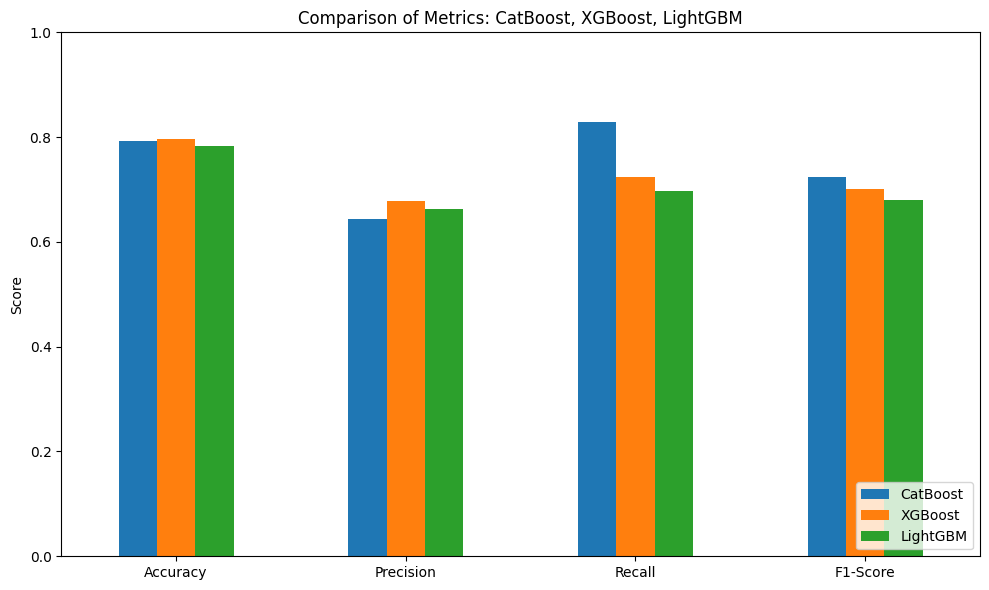

In [29]:
# Create a dictionary with the model performance metrics
data = {
    'CatBoost': [accuracy_cat, precision_cat, recall_cat, f1_cat],
    'XGBoost': [accuracy_xg, precision_xg, recall_xg, f1_xg],
    'LightGBM': [accuracy_light, precision_light, recall_light, f1_light]
}

# Define metric names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Convert the dictionary into a pandas DataFrame
df_metrics = pd.DataFrame(data, index=metrics)

# Plot the metrics comparison
df_metrics.plot(kind='bar', figsize=(10, 6))

# Set plot labels and title
plt.title('Comparison of Metrics: CatBoost, XGBoost, LightGBM')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)

# Display the plot
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## Predictive Model

In [30]:
input_data = (2,160,60,28,130,25.5,2.128,38,76,714)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = xgb_clf.predict(input_data_reshaped)
print(prediction)

print("The person has Diabetes" if prediction[0] else "The person does not have Diabetes")

[1]
The person has Diabetes
